## Kymograph Cluster Code

should I add a retry call by default?

In [1]:
import trenchripper as tr

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/dask_jobqueue/config.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
!sbatch -p transfer -t 0-12:00 --wrap="rsync -r /n/files/SysBio/PAULSSON\ LAB/Daniel/Image_Data/Bacillus_Project/2019-05-13_bacillus_training_data/ /n/scratch2/de64/2019-05-13_bacillus_training_data"

Submitted batch job 41305444


#### Start Dask

In [2]:
# kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='2GB')
kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='4GB')
kymo_controller.startdask()
kymo_controller.daskcluster.start_workers()

In [3]:
kymo_controller.daskclient

Client Scheduler: tcp://10.120.16.189:50206 Dashboard: http://10.120.16.189:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


#### Perform Extraction

In [4]:
# hdf5_extractor = tr.ndextract.hdf5_fov_extractor("/n/scratch2/de64/full_pipeline_test/40x_Ph2_Test_1.5.nd2","/n/scratch2/de64/full_pipeline_test")
hdf5_extractor = tr.ndextract.hdf5_fov_extractor("/n/scratch2/de64/2019-05-13_bacillus_training_data/NDExp_Seq0000.nd2","/n/scratch2/de64/2019-05-13_bacillus_training_data")

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/nd2reader/common_raw_metadata.py:94: RuntimeWarning: Reported average frame interval (426929.1 ms) doesn't match the set interval (900000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)


In [5]:
hdf5_extractor.fov_metadata[:5]

,fov,t,x,y,z
0,0,5.633044,7467.5,1414.8,5299.95
1,0,428.153476,7469.9,1414.8,5300.70
2,0,848.096212,7469.9,1414.8,5300.50
3,0,1268.186668,7469.8,1414.8,5300.40
4,0,1688.212492,7469.9,1414.7,5300.40


In [6]:
print(hdf5_extractor.exp_metadata['fields_of_view'])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [10]:
fov_list = list(range(0,40))

In [8]:
hdf5_extractor.writemetadata()

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/tables/path.py:157: NaturalNameWarning: object name is a Python keyword: 'global'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


In [11]:
kymo_controller.mapfovs(hdf5_extractor.extract_fov,fov_list)

In [24]:
kymo_controller.retry_failed()

In [15]:
kymo_controller.retry_processing()

Worker tcp://10.120.16.160:42887 restart in Job 41609817. This can be due to memory issue.
Worker tcp://10.120.16.160:56485 restart in Job 41609819. This can be due to memory issue.
Worker tcp://10.120.16.160:43287 restart in Job 41609818. This can be due to memory issue.
Worker tcp://10.120.16.155:53925 restart in Job 41609843. This can be due to memory issue.
Worker tcp://10.120.16.78:47620 restart in Job 41609837. This can be due to memory issue.
Worker tcp://10.120.16.193:50781 restart in Job 41609821. This can be due to memory issue.
Worker tcp://10.120.17.9:48076 restart in Job 41609812. This can be due to memory issue.
Worker tcp://10.120.16.243:54795 restart in Job 41609814. This can be due to memory issue.
Worker tcp://10.120.16.243:38300 restart in Job 41609811. This can be due to memory issue.
Worker tcp://10.120.16.136:55973 restart in Job 41609850. This can be due to memory issue.
Worker tcp://10.120.16.136:33727 restart in Job 41609849. This can be due to memory issue.
Wo

In [ ]:
# props = kymo_controller.daskclient.gather(kymo_controller.futures) #this will hang until all futures are done

In [9]:
# hdf5_extractor.writemetadata()
hdf5_extractor.extract_fov(4)

In [4]:
# test = tr.utils.pandas_hdf5_handler("/n/scratch2/de64/full_pipeline_test/metadata.hdf5")

#### End Dask, Cancel Jobs

In [12]:
kymo_controller.shutdown()

In [1]:
#scancel --name=dask-worker --user=de64

#### Generate Kymographs

#### Start Dask

In [2]:
kymo_controller = tr.cluster.dask_controller(walltime='04:00:00',local=False,n_workers=40,memory='4GB')
kymo_controller.startdask()
kymo_controller.daskcluster.start_workers()

In [3]:
kymo_controller.daskclient

Client Scheduler: tcp://10.120.16.182:44941 Dashboard: http://10.120.16.182:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [20]:
kymo_controller.daskclient.restart()

Worker tcp://10.120.16.245:37690 restart in Job 41036842. This can be due to memory issue.
Worker tcp://10.120.16.245:42723 restart in Job 41036822. This can be due to memory issue.
Worker tcp://10.120.17.15:52797 restart in Job 41036844. This can be due to memory issue.
Worker tcp://10.120.16.162:52759 restart in Job 41036839. This can be due to memory issue.
Worker tcp://10.120.16.192:53899 restart in Job 41036818. This can be due to memory issue.
Worker tcp://10.120.16.240:53652 restart in Job 41036841. This can be due to memory issue.
Worker tcp://10.120.16.170:39129 restart in Job 41036835. This can be due to memory issue.
Worker tcp://10.120.16.170:42636 restart in Job 41036846. This can be due to memory issue.
Worker tcp://10.120.16.42:46835 restart in Job 41036826. This can be due to memory issue.
Worker tcp://10.120.17.11:39089 restart in Job 41036809. This can be due to memory issue.
Worker tcp://10.120.16.171:38779 restart in Job 41036819. This can be due to memory issue.
Wo

Client Scheduler: tcp://10.120.16.183:35598 Dashboard: http://10.120.16.183:8787/status,Cluster Workers: 41 Cores: 41 Memory: 164.00 GB


In [18]:
# headpath = "/n/scratch2/de64/full_pipeline_test"
# all_channels = ["channel_RFP","channel_BF"]

# kymo = tr.kymograph.kychunker(headpath=headpath,all_channels=all_channels,trench_len_y=270,padding_y=40,trench_width_x=30,\
#                  t_chunk=25,t_range=(0,-1),y_percentile=90,y_min_edge_dist=80,smoothing_kernel_y=(17,1),triangle_nbins=50,triangle_scaling=1.60,\
#                  expected_num_rows=2,orientation_detection=0,x_percentile=95,background_kernel_x=(21,1),smoothing_kernel_x=(9,1),otsu_nbins=50,otsu_scaling=0.7)


headpath = "/n/scratch2/de64/2019-05-13_bacillus_training_data/"
all_channels = ["channel_RFP","channel_Phase"]

kymo = tr.kymograph.kychunker(headpath=headpath,all_channels=all_channels,trench_len_y=200,padding_y=20,trench_width_x=20,\
                 t_chunk=100,t_range=(0,-1),y_percentile=60,y_min_edge_dist=80,smoothing_kernel_y=(17,1),triangle_nbins=50,triangle_scaling=1.1,\
                 expected_num_rows=2,orientation_detection=0,orientation_on_fail=1,x_percentile=99,background_kernel_x=(21,1),smoothing_kernel_x=(9,1),otsu_nbins=50,otsu_scaling=0.25)

In [ ]:
# Y Percentile 60
# Y Smoothing Kernel 17
# Triangle Trheshold Bins 50
# Triangle Threshold Scaling 1.1
# Minimum Trench Length 50
# Y Padding 20
# Trench Length 200
# Orientation Detection Method 0
# Expected Number of Rows (Manual Orientation Detection) 2
# Top Orientation when Row Drifts Out (Manual Orientation Detection) 0
# X Percentile 99
# X Background Kernel 21
# X Smoothing Kernel 9
# Otsu Trheshold Bins 50
# Otsu Threshold Scaling 0.33
# Trench Width 26

In [20]:
# fov_list = list(range(0,80))
fov_list = list(range(0,40))

In [21]:
kymo_controller.mapfovs(kymo.generate_kymograph,fov_list,retries=1)

In [19]:
kymo_controller.retry_failed()

Worker tcp://10.120.17.15:43808 restart in Job 41036844. This can be due to memory issue.
Worker tcp://10.120.16.162:54276 restart in Job 41036839. This can be due to memory issue.
Worker tcp://10.120.16.240:49237 restart in Job 41036841. This can be due to memory issue.
Worker tcp://10.120.16.239:44172 restart in Job 41036832. This can be due to memory issue.
Worker tcp://10.120.16.245:46225 restart in Job 41036842. This can be due to memory issue.
Worker tcp://10.120.16.245:44293 restart in Job 41036822. This can be due to memory issue.
Worker tcp://10.120.16.192:45802 restart in Job 41036818. This can be due to memory issue.
Worker tcp://10.120.16.192:44079 restart in Job 41036817. This can be due to memory issue.
Worker tcp://10.120.16.178:34030 restart in Job 41036830. This can be due to memory issue.
Worker tcp://10.120.16.169:48143 restart in Job 41036834. This can be due to memory issue.
Worker tcp://10.120.16.169:44339 restart in Job 41036845. This can be due to memory issue.


In [22]:
kymo.collect_metadata(fov_list,use_archive=False,overwrite_archive=True)

fovs processed: 35/40
lanes processed: 70
trenches processed: 5739
lanes/fov: 2.0
trenches/fov: 163.97142857142856
failed fovs: [36, 39, 12, 17, 27]


In [4]:
kymo.collect_metadata(fov_list,use_archive=True,overwrite_archive=False)

fovs processed: 79/80
lanes processed: 136
trenches processed: 7507
lanes/fov: 1.7215189873417722
trenches/fov: 95.0253164556962
failed fovs: [77]


maybe an estimate of memory usage

In [19]:
kymo.generate_kymograph(0)

/home/de64/TrenchRipper/trenchripper/utils.py:294: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [1]:
import h5py
from matplotlib import pyplot as plt

In [8]:
# for fov in fov_list:
for fov in [12,63]:
    print(fov)
    with h5py.File("/n/scratch2/de64/full_pipeline_test/hdf5/fov_"+str(fov)+".hdf5") as testfile:
        data = testfile['channel_RFP']
        arr = data[:,:,0]

12
63


In [7]:
arr.shape

(2048,)

In [6]:
import numpy as np
arr = np.array([1,2,3,4])
arr[np.array([0,2,3])]

array([1, 3, 4])

In [1]:
import pandas as pd

In [46]:
meta_handle = tr.utils.pandas_hdf5_handler("/n/scratch2/de64/2019-05-10_bacillus_training_data/metadata.hdf5")
global_meta = meta_handle.read_df("global",read_metadata=True)

/home/de64/TrenchRipper/trenchripper/utils.py:293: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [47]:
global_meta.metadata

{'height': 2048,
 'width': 2048,
 'date': datetime.datetime(2019, 5, 11, 11, 3, 13),
 'fields_of_view': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 'frames': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74],
 'z_levels': [],
 'total_images_per_channel': 3000,
 'channels': ['Phase', 'RFP'],
 'pixel_microns': 0.161563668819371,
 'num_frames': 75,
 'experiment': {'description': '',
  'loops': [{'start': 0,
    'duration': 

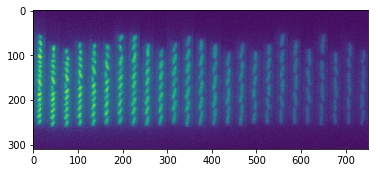

In [16]:
kymo_handle = tr.utils.kymo_handle()
kymo_handle.import_wrap(h5py_handle["0/channel_RFP"][39])
plt.imshow(kymo_handle.return_unwrap())

#### Generate Segmentation

#### Start Dask

In [4]:
kymo_controller = tr.cluster.dask_controller(walltime='01:00:00',local=False,n_workers=80,memory='1GB')
kymo_controller.startdask()
kymo_controller.daskcluster.start_workers()

In [5]:
kymo_controller.daskclient

Client Scheduler: tcp://10.120.16.182:49411 Dashboard: http://10.120.16.182:8787/status,Cluster Workers: 13 Cores: 13 Memory: 13.00 GB


In [23]:
kymo_controller.daskclient.restart()

Worker tcp://10.120.17.14:40958 restart in Job 41609839. This can be due to memory issue.
Worker tcp://10.120.16.155:53925 restart in Job 41609843. This can be due to memory issue.
Worker tcp://10.120.16.188:51876 restart in Job 41609831. This can be due to memory issue.
Worker tcp://10.120.16.188:33826 restart in Job 41609832. This can be due to memory issue.
Worker tcp://10.120.16.94:43179 restart in Job 41609842. This can be due to memory issue.
Worker tcp://10.120.16.190:44899 restart in Job 41609810. This can be due to memory issue.
Worker tcp://10.120.16.155:58305 restart in Job 41609843. This can be due to memory issue.
Worker tcp://10.120.17.95:33322 restart in Job 41609846. This can be due to memory issue.
Worker tcp://10.120.16.193:56620 restart in Job 41609821. This can be due to memory issue.
Worker tcp://10.120.16.243:47095 restart in Job 41609811. This can be due to memory issue.
Worker tcp://10.120.16.243:55645 restart in Job 41609814. This can be due to memory issue.
Wo

Client Scheduler: tcp://10.120.16.189:50206 Dashboard: http://10.120.16.189:8787/status,Cluster Workers: 40 Cores: 40 Memory: 160.00 GB


distributed.scheduler - ERROR - Nannies didn't report back restarted within timeout.  Continuuing with restart process
tornado.application - ERROR - Exception in Future <Future finished exception=CommClosedError("in <closed TCP>: Stream is closed: while trying to call remote method 'restart'")> after timeout
Traceback (most recent call last):
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/distributed/comm/tcp.py", line 181, in read
    n_frames = yield stream.read_bytes(8)
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/tornado/gen.py", line 729, in run
    value = future.result()
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/distributed/core.py", line 580, in send_recv_from_rpc
    result = yield send_recv(comm=comm, op=key, **kwargs)
  File "/

In [15]:
# segment = tr.segment.fluo_segmentation_cluster("/n/scratch2/de64/full_pipeline_test","channel_RFP",smooth_sigma=0.75,wrap_pad=3,hess_pad=4,min_obj_size=30,cell_mask_method='local',\
#                  cell_otsu_scaling=1.,local_otsu_r=15,edge_threshold_scaling=1.,threshold_range=20,threshold_step=10,convex_threshold=0.8)
segment = tr.segment.fluo_segmentation_cluster("/n/scratch2/de64/2019-05-10_bacillus_training_data/","channel_RFP",smooth_sigma=0.75,wrap_pad=3,hess_pad=4,min_obj_size=30,cell_mask_method='local',\
                 cell_otsu_scaling=1.,local_otsu_r=15,edge_threshold_scaling=1.,threshold_range=20,threshold_step=10,convex_threshold=0.8)

In [16]:
# fov_list = list(set(range(0,80))-set([77]))
fov_list = list(set(range(0,40)) - set([34, 35, 36, 37, 38, 39, 9, 10, 11, 17]))

In [17]:
kymo_controller.mapfovs(segment.generate_segmentation,fov_list)

In [3]:
segment.generate_segmentation(10)

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-735f591619c3>", line 1, in <module>
    segment.generate_segmentation(10)
  File "/home/de64/TrenchRipper/trenchripper/segment.py", line 242, in generate_segmentation
    hdf5_dataset = self.segment(kymo_arr)
  File "/home/de64/TrenchRipper/trenchripper/segment.py", line 170, in segment
    cell_mask = self.cell_region_mask(working_img,method=self.cell_mask_method,cell_otsu_scaling=self.cell_otsu_scaling,t_tot=t_tot,local_otsu_r=self.local_otsu_r)
  File "/home/de64/TrenchRipper/trenchripper/segment.py", line 56, in cell_region_mask
    local_otsu = sk.filters.rank.otsu(img_arr, otsu_selem)
  File "/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/skimage/filters/rank/generic.py", line 1003, in otsu
    shift_y=shift_y)
  Fi

KeyboardInterrupt: 

In [13]:
kymo_controller.daskclient.get_futures_error(kymo_controller.futures[1])

(<function trenchripper.cluster.dask_controller.mapfovs.<locals>.mapallfovs(fov_number, function=<bound method fluo_segmentation_cluster.generate_segmentation of <trenchripper.segment.fluo_segmentation_cluster object at 0x7fbbc7cd7550>>)>,
 (1,),
 {},
 ())

#### End Dask, Cancel Jobs

In [24]:
kymo_controller.shutdown()

In [9]:
import h5py
from matplotlib import pyplot as plt
import numpy as np
import skimage as sk

/home/de64/anaconda3/envs/mothermachine/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
data = h5py.File("/n/scratch2/de64/2019-05-10_bacillus_training_data/hdf5/fov_1.hdf5")

In [28]:
array = data["channel_RFP"][:,:,10]

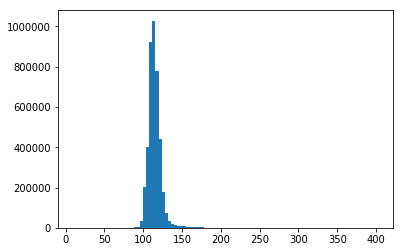

In [29]:
plt.hist(array.flatten(),bins=100)
plt.show()

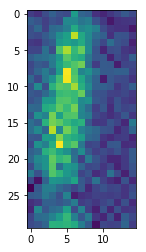

In [39]:
plt.imshow(array[470:500,175:190])

In [40]:
array[470:500,175:190]

array([[116, 112, 122, 130, 123, 121, 157, 132, 129, 112, 108, 114, 119,
        127, 121],
       [129, 125, 117, 124, 121, 148, 148, 139, 143, 124, 115, 103, 112,
        113, 114],
       [123, 133, 118, 134, 136, 144, 164, 147, 151, 144, 122, 114, 112,
        112, 103],
       [123, 121, 128, 136, 151, 159, 196, 163, 149, 135, 130, 112, 125,
        124, 114],
       [115, 113, 125, 129, 156, 160, 156, 164, 148, 130, 120, 136, 125,
        122, 106],
       [119, 119, 137, 122, 176, 193, 170, 181, 149, 125, 108, 122, 123,
        114, 111],
       [129, 135, 137, 142, 155, 178, 167, 164, 140, 126, 127, 107, 121,
        116, 129],
       [120, 128, 125, 141, 160, 171, 177, 183, 137, 116, 128, 127, 105,
        119, 120],
       [122, 132, 142, 131, 158, 206, 175, 146, 152, 138, 128, 128, 130,
        130, 118],
       [133, 120, 140, 152, 173, 205, 178, 162, 144, 131, 105, 126, 122,
        121, 113],
       [125, 149, 123, 167, 178, 176, 192, 166, 149, 130, 130, 127, 114,
       

In [ ]:
np.percentile(data["channel_RFP"][:,:,0],90)

In [21]:
kymo_handle = tr.utils.kymo_handle()

In [25]:
list(data.keys())

['18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

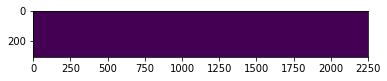

In [29]:
kymo_handle.import_wrap(data['19'])
plt.imshow(kymo_handle.return_unwrap())

### NOTE

- **How to deal with some fovs having a different number of rows than other fovs??? Try to make more flexible...**

maybe add a kymograph viewer here

### Note
There may be an issue where hdf5 files do not close properly on crashes...

In [7]:
# props = kymo_controller.daskclient.gather(kymo_controller.futures) #this will hang until all futures are done

#### End Dask, Cancel Jobs

In [14]:
kymo_controller.shutdown()

In [ ]:
#scancel --name=dask-worker --user=de64

#### Note: access request to the transfer partition pending; automate this bit later

In [10]:
import subprocess

in_path = "/n/files/SysBio/PAULSSON LAB/Daniel/Image_Data/test"
out_path = "/n/scratch2/de64/for_sylvia/"
wrap_str = "rsync " + in_path + " " + out_path
cmd_str = 'sbatch -p transfer -t 0-12:00 --wrap="' + wrap_str + '"'

subprocess.check_output(cmd_str,
                shell=True)

CalledProcessError: Command 'sbatch -p transfer -t 0-12:00 --wrap="rsync /n/files/SysBio/PAULSSON LAB/Daniel/Image_Data/test /n/scratch2/de64/for_sylvia/"' returned non-zero exit status 1.

In [6]:
cmd_str

'sbatch -p transfer -t 0-12:00 --wrap="rsync /n/files/SysBio/PAULSSON LAB/Daniel/Image_Data/2019-02-08_bacillus_mbm_top_s750_bottom /n/scratch2/de64/for_sylvia/"'

In [11]:
!sbatch -p transfer -t 0-12:00 --wrap="rsync /n/files/SysBio/PAULSSON\LAB/Daniel/Image_Data/Bacillus_Project/test /n/scratch2/de64/for_sylvia/"

sbatch: error: Batch job submission failed: User's group not permitted to use this partition


#### Note: need to find a way to associate lanes from init barcoding snapshot with imaging lanes

plan:
- extract and segment (with phase) barcoding file
- extract and segment experiemnt file
- for both, note x positions of t=0 trenches
- compare these values to map trenches to eachother...